In [1]:
import pandas as pd

df = pd.read_csv("../OldDataSet.csv")

In [2]:
df

,Profile Pic,Nums/Length Username,Full Name Words,Bio Length,External Url,Private,Verified,Business,#Posts,#Followers,#Following,Fake
0,1,0.000,2,42,1,0,0,0,102,678,405,0
1,1,0.067,2,0,0,0,0,0,58,334,434,0
2,1,0.000,0,0,0,0,0,0,44,539,364,0
3,1,0.000,2,14,0,0,0,0,188,3098,286,0
4,1,0.000,2,0,0,0,0,1,496,1079,1979,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1395,0,0.400,0,0,0,0,0,0,0,14,468,1
1396,1,0.143,3,0,0,0,0,0,20,51,423,1
1397,1,0.000,1,0,0,0,0,0,2,267,3555,1
1398,1,0.000,1,137,0,0,0,0,9,164,4058,1


In [3]:
# Set X array, containing all the values to valuate a Fake Account
X = df.iloc[:, 0:11].values
X[0]

array([  1.,   0.,   2.,  42.,   1.,   0.,   0.,   0., 102., 678., 405.])

In [4]:
# Assign y and print 
y=df.iloc[:,11].values
y

array([0, 0, 0, ..., 1, 1, 1])

In [5]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectFromModel

"""
  Tree-based estimators can be used to compute feature importances, 
  which in turn can be used to discard irrelevant features
"""

clf = ExtraTreesClassifier(n_estimators=50)
clf = clf.fit(X, y)
clf.feature_importances_ 

array([0.05443675, 0.06561806, 0.0415604 , 0.11598953, 0.09528503,
       0.02284224, 0.04957313, 0.14933449, 0.07488964, 0.10126583,
       0.2292049 ])

In [6]:
model = SelectFromModel(clf, prefit=True)
X_new = model.transform(X)
X_new.shape

(1400, 5)

In [7]:
X_new[0]

array([ 42.,   1.,   0., 678., 405.])

Feature ranking:
1. feature 4 (0.307948) #Following
2. feature 3 (0.216056) #Follower
3. feature 0 (0.180093) Bio Length
4. feature 2 (0.170601) Business
5. feature 1 (0.125302) External URL


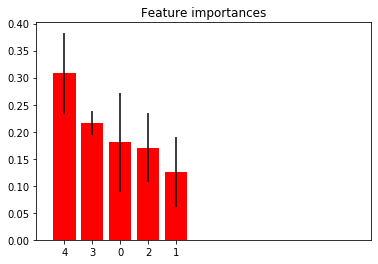

In [8]:
"""
 Feature Importance Forest of Trees
"""
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X_new, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

def printColumn(number):
  switcher = {
      0: "Bio Length",
      1: "External URL",
      2: "Business",
      3: "#Follower",
      4: "#Following"
  }
  return switcher.get(number, "Invalid Column")

for f in range(X_new.shape[1]):
    print("%d. feature %d (%f) %s" % (f + 1, indices[f], importances[indices[f]], printColumn(indices[f])))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_new.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_new.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [9]:
"""
  Decision Tree Classifier
"""
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_new, y)

# Train and Test algorithms
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.33, random_state=42)

print(len(X_train), len(y_train))
print(len(X_test), len(y_test))

print(clf.fit(X_train, y_train))

print("TRAIN SET", clf.score(X_train, y_train))
print("TEST  SET", clf.score(X_test, y_test))

938 938
462 462
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
TRAIN SET 1.0
TEST  SET 0.9329004329004329
